## Install Gradio App

In [1]:
!pip install gradio -q

## Create Datablock and Learner

In [1]:
from fastai.vision.all import *

In [2]:
path = Path('marvel_characters')
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(256)],
    batch_tfms=aug_transforms(size=224),
).dataloaders(path)
learn = vision_learner(dls, 'seresnext50_32x4d')
learn.load('marvel_resnext50')

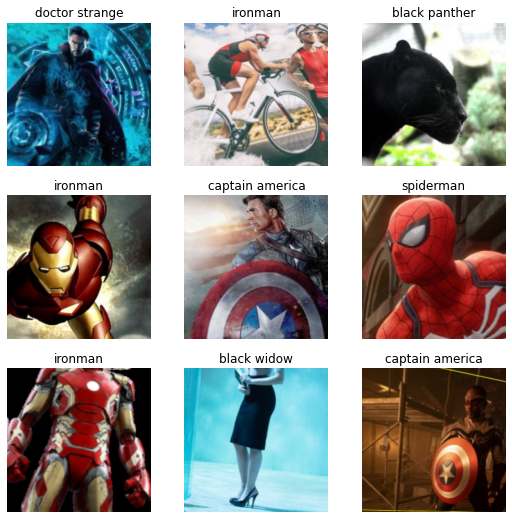

In [3]:
dls.show_batch()

In [4]:
def find_character(img):
    character,_,probs = learn.predict(img)
    probs = [o.item() for o in probs]
    return dict(zip(dls.vocab,probs))

In [5]:
import gradio as gr
demo = gr.Interface(fn=find_character, 
                    inputs=gr.inputs.Image(shape=(256, 256)),
                    outputs= gr.outputs.Label(num_top_classes=3)
                   )
if __name__ == "__main__":
    demo.launch(server_name="0.0.0.0",
                server_port=6006
               )

Running on local URL:  http://localhost:6006/

To create a public link, set `share=True` in `launch()`.
